# Problem 1

### Approach 1

**Assumption: door No.1 is selected; probability of car behind of any doors is equal and it is equal to 1/3**

***Then there are two scenarios:***

- Under what circumstance staying should be your choice
***
     Firstly you have to make sure yout initial choice happens to be the door that the car is behind it. If the car is behind door No.1, and probability of winning is 1/3 and probability of losing is 2/3
     
***
- Under what circumstance switching is good
***
     If switching would lead to a winning, the underlying assumption here is that your first choice is bad. Once your first choice is bad, switching always lands you on the prize. Having this in mind, we can see the probability of selecting bad doors is the probability of winning, which is 2/3. 
***

### Approach 2

**Assumption: door No.1 is selected; probability of car behind of any doors is equal and it is equal to 1/3**

In an exhaustive manner, we can list all choices,
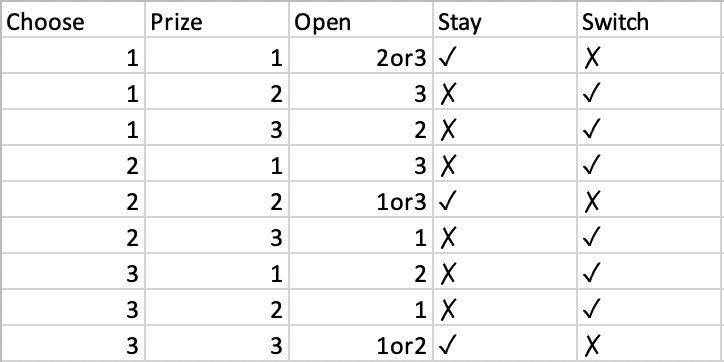

Thus, you can see staying gives you 1/3 winning and switching gives you 2/3 of winning.

**Conclusion: Switching choice gives the 2 times odds of winning.**

*****

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()


from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Problem 2

In [2]:
df = pd.read_csv('Data.txt', sep='\t')
df = df.rename(columns={'region':'State'})
df.head()

,tdid,logentrytime,logfileid,site,userHourOfWeek,country,State,metro,city,devicetype,osfamily,os,browser,FavoriteMovieGenre
0,f0fd92db-69a2-4daf-a6cf-2ed33a506f28,5/2/2015 19:18,371391483,www.youtube.com,158,United States,Massachusetts,506,Boston,PC,Windows,Windows8,Chrome,BlindedGenre1
1,10d01d03-f5f0-4a71-8282-ebdec05238db,5/2/2015 19:29,371399382,www.popupportal.com,158,United States,Maine,500,Waterville,PC,Windows,Windows8,Firefox,BlindedGenre1
2,17c936b4-1baf-43e4-bb00-ad9f752efd7c,5/2/2015 11:11,371086147,yahoonetplus.com,150,United States,Virginia,518,Lambsburg,PC,Windows,Windows7,InternetExplorer11,?????
3,17c936b4-1baf-43e4-bb00-ad9f752efd7c,5/2/2015 11:12,371087588,yahoonetplus.com,150,United States,Virginia,518,Lambsburg,PC,Windows,Windows7,InternetExplorer11,?????
4,9bd03ad9-002a-4200-9602-b8a0bbad5d36,5/2/2015 3:14,370772995,damndelicious.net,142,United States,Michigan,505,Ann Arbor,PC,Windows,Windows7,Firefox,BlindedGenre2


In [3]:
df['FavoriteMovieGenre'].value_counts()

?????            66992
BlindedGenre3    18080
BlindedGenre1    17038
BlindedGenre2    14427
BlindedGenre4     6948
BlindedGenre5     1518
Name: FavoriteMovieGenre, dtype: int64

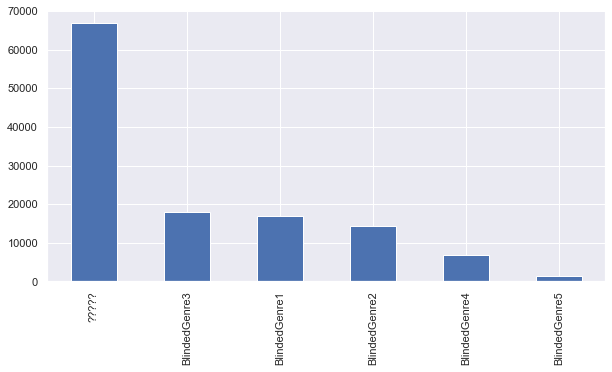

In [4]:
df['FavoriteMovieGenre'].value_counts().plot(kind = 'bar',figsize=(10,5))

In [5]:
# Found site has 17 missing values which can be ignored given 120000 datapoints
df = df.dropna()
df.isnull().sum()

tdid                  0
logentrytime          0
logfileid             0
site                  0
userHourOfWeek        0
country               0
State                 0
metro                 0
city                  0
devicetype            0
osfamily              0
os                    0
browser               0
FavoriteMovieGenre    0
dtype: int64

In [6]:
df = df.loc[df['userHourOfWeek'] != '(null)']

# get the hour of the day
df['userHourOfWeek'] = pd.to_numeric(df['userHourOfWeek'])
df['userHourOfDay'] = df['userHourOfWeek']%24
print(df['userHourOfDay'].unique())

# Mark hours like 12am to 4am as late night the previous day
df['weeHours'] = df['userHourOfWeek'] <5
df['normHours'] = df['userHourOfWeek'] >=5

df['userDayOfWeek'] = df['userHourOfWeek'] // 24
df.loc[df.weeHours == True, 'userDayOfWeek'] = df['userDayOfWeek'] -1
df.loc[df['userDayOfWeek'] == -1, 'userDayOfWeek'] = 6
print(df['userDayOfWeek'].unique())

[14  6 22  8 19 13 12 11 16 23 20 17 21  5 15 10  9 18  1  7  0  4  3  2]
[6 5 4 0 1 2 3]


In [7]:
# combing (null) and other into one group
df.replace('(null)', 'Other', inplace=True)

In [8]:
# all versions of IE is IE 
df['browser'] = df['browser'].replace({'InternetExplorer11':'InternetExplorer'})
df['browser'] = df['browser'].replace({'InternetExplorer10':'InternetExplorer'})
df['browser'] = df['browser'].replace({'InternetExplorer9':'InternetExplorer'})
df['browser'] = df['browser'].replace({'InternetExplorer8':'InternetExplorer'})
df['browser'] = df['browser'].replace({'InternetExplorer7':'InternetExplorer'})

In [9]:
# slice out users who have been exposed to genres and who have not
df_exposed = df[df['FavoriteMovieGenre']!= '?????']
# data with no exposure
df_unexposed = df[df['FavoriteMovieGenre']== '?????']

df_exposed['FavoriteMovieGenre'].value_counts()

BlindedGenre3    17869
BlindedGenre1    16413
BlindedGenre2    14301
BlindedGenre4     6847
BlindedGenre5     1510
Name: FavoriteMovieGenre, dtype: int64

In [10]:
# groupby by genres 
grouped = df_exposed.groupby(['FavoriteMovieGenre'])

# extract out subgroups
genre1 = grouped.get_group('BlindedGenre1')
genre2 = grouped.get_group('BlindedGenre2')
genre3 = grouped.get_group('BlindedGenre3')
genre4 = grouped.get_group('BlindedGenre4')
genre5 = grouped.get_group('BlindedGenre5')

In [11]:
genre5['site'].unique()

array(['www.theguardian.com', 'yahoonetplus.com',
       'en.what-character-are-you.com', 'www.filmon.com', 'homeaway.com',
       'www.phonearena.com', 'www.phonebunch.com', 'indianexpress.com',
       'google.site-not-provided', 'www.ibtimes.com', 'us.msn.com',
       'find.mapmuse.com', 'www.lohud.com', 'cafemom.com',
       'www.weather.com', 'www.tasteofhome.com',
       'www.businessinsider.com', 'sourceforge.net', 'phandroid.com',
       'www.1001fonts.com', 'www.fontspace.com', 'www.seeko.co.kr',
       'www.answers.com', 'sports.yahoo.com', 'es.thefreedictionary.com',
       'www.condenast.com', 'www.latimes.com', 'www.yelp.com',
       'work.chron.com', 'http%3a%2f%2fwww.ocregister.com',
       'en.kioskea.net', 'www.ocregister.com', 'www.indiewire.com',
       'rasamalaysia.com', 'fb-718.lifebuzz.com',
       'listings.findthecompany.com', 'whois.domaintools.com',
       'www.urbandictionary.com', 'www.youtube.com', 'www.overstock.com',
       'indiatoday.intoday.in', 'www.s

### Device Type Distribution in Genres

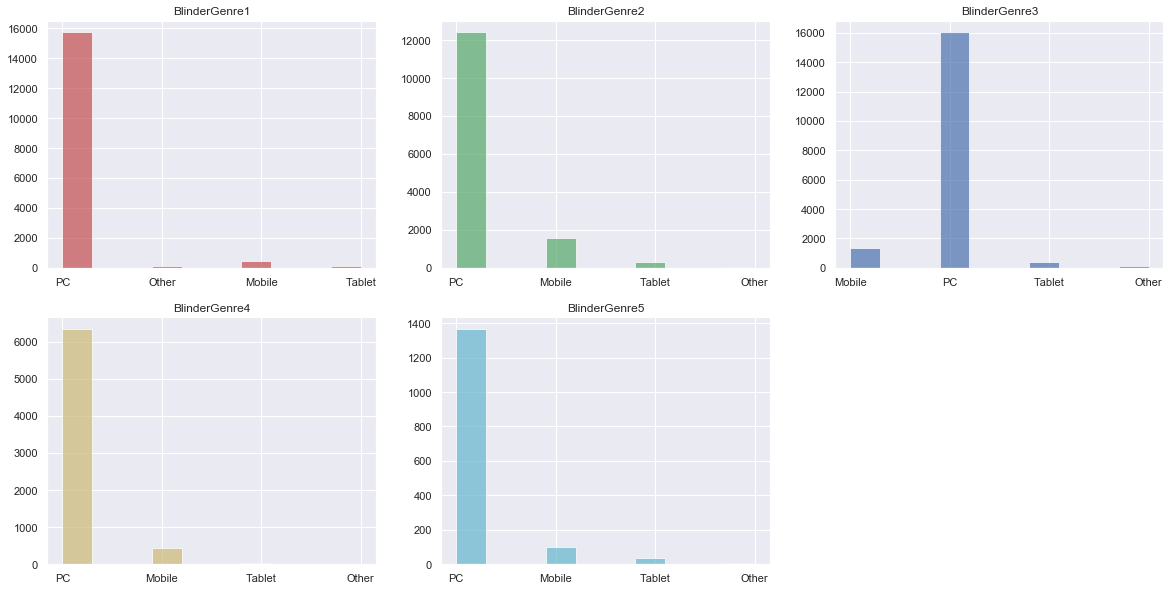

In [12]:
plt.figure(figsize=(20,10))


plt.subplot(2,3,1)
plt.hist(genre1['devicetype'], color = 'r', alpha=0.7)
plt.title('BlinderGenre1')

plt.subplot(2,3,2)
plt.hist(genre2['devicetype'], color = 'g', alpha=0.7)
plt.title('BlinderGenre2')

plt.subplot(2,3,3)
plt.hist(genre3['devicetype'], color = 'b', alpha=0.7)
plt.title('BlinderGenre3')

plt.subplot(2,3,4)
plt.hist(genre4['devicetype'], color = 'y', alpha=0.7)
plt.title('BlinderGenre4')

plt.subplot(2,3,5)
plt.hist(genre5['devicetype'], color = 'c', alpha=0.7)
plt.title('BlinderGenre5')

plt.show()

### Browser distribution in Genres

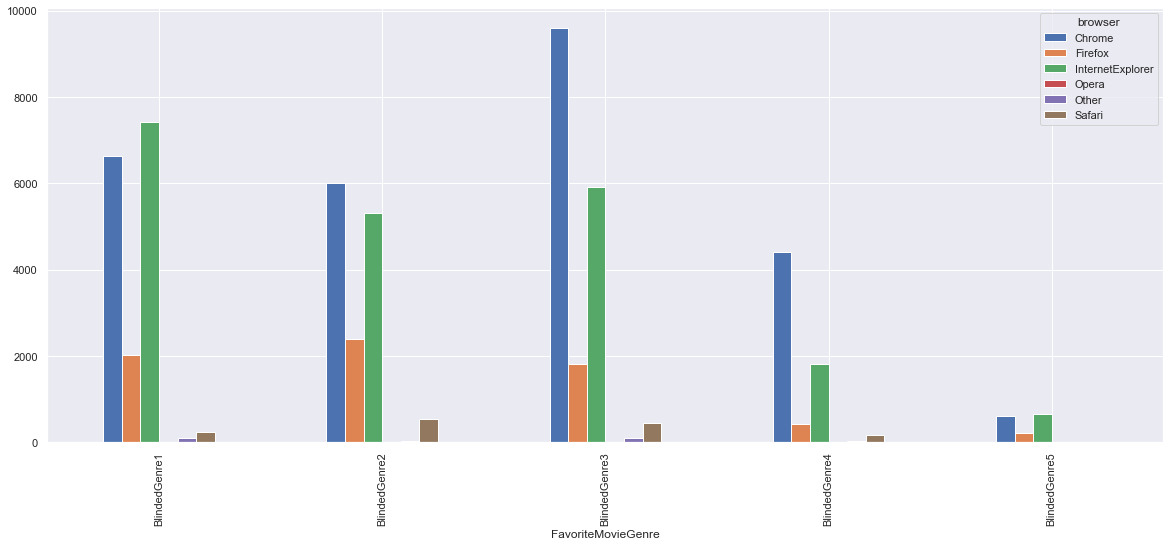

In [13]:
bros = df_exposed.groupby('FavoriteMovieGenre').browser.value_counts().sort_index()
bros.unstack().plot(kind='bar',figsize = (20,8))

### Day of week in Genres

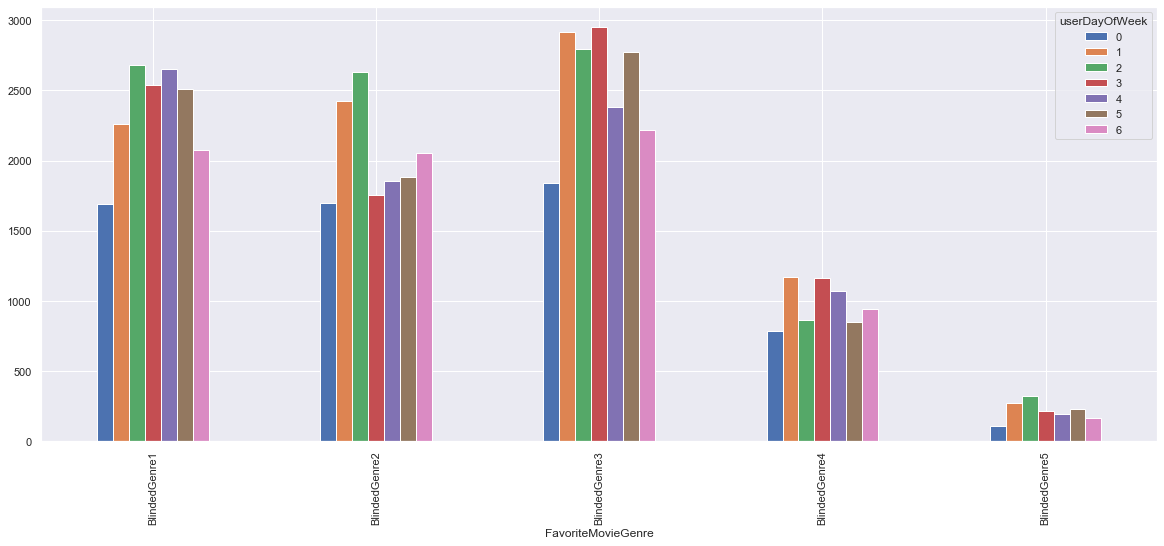

In [14]:
weekday = df_exposed.groupby('FavoriteMovieGenre').userDayOfWeek.value_counts().sort_index()
weekday.unstack().plot(kind='bar',figsize = (20,8))

### Country 

In [15]:
display(genre1['country'].value_counts()[:5].sort_values(ascending=False))
display(genre2['country'].value_counts()[:5].sort_values(ascending=False))
display(genre3['country'].value_counts()[:5].sort_values(ascending=False))
display(genre4['country'].value_counts()[:5].sort_values(ascending=False))
display(genre5['country'].value_counts()[:5].sort_values(ascending=False))

United States     15632
Canada              328
Japan               296
Other                89
United Kingdom       29
Name: country, dtype: int64

United States     9970
Canada            1624
Australia         1584
Ireland            906
United Kingdom      55
Name: country, dtype: int64

United States     16479
Canada              472
France              226
Australia           205
United Kingdom       88
Name: country, dtype: int64

United States     5907
Canada             538
Malaysia           108
Singapore          101
United Kingdom      49
Name: country, dtype: int64

United States     1294
United Kingdom      94
Canada              56
India               34
New Zealand          9
Name: country, dtype: int64

In [16]:
# select top 5 countries
sub1 = genre1[genre1['country'].isin(['United States','Canada','Japan','Other','United Kingdom'])]
sub2 = genre2[genre2['country'].isin(['United States','Canada','Australia','Ireland','United Kingdom'])]
sub3 = genre3[genre3['country'].isin(['United States','Canada','France','Australia','United Kingdom'])]
sub4 = genre4[genre4['country'].isin(['United States','Canada','Malaysia','Singapore','United Kingdom'])]
sub5 = genre5[genre5['country'].isin(['United States','United Kingdom','Canada','India','New Zealand'])]

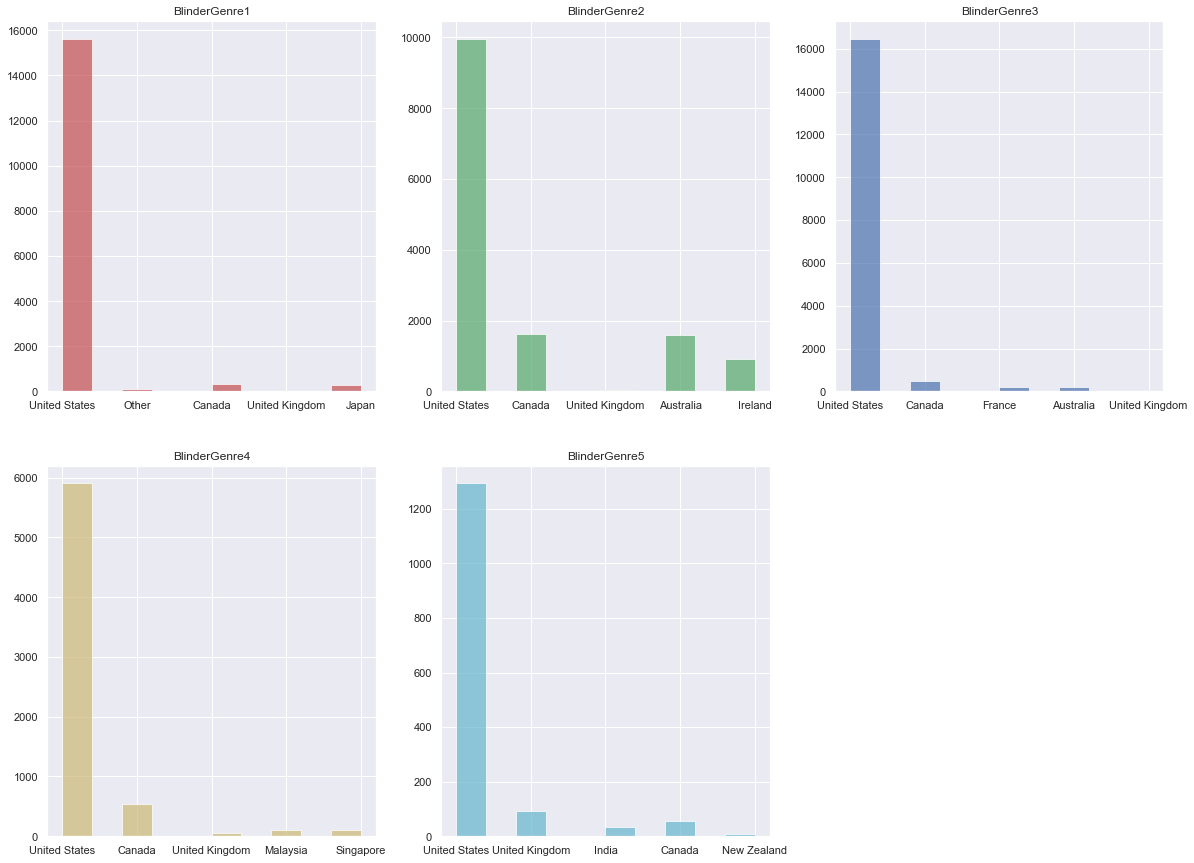

In [17]:
plt.figure(figsize=(20,15))


plt.subplot(2,3,1)
plt.hist(sub1['country'], color = 'r', alpha=0.7)
plt.title('BlinderGenre1')

plt.subplot(2,3,2)
plt.hist(sub2['country'], color = 'g', alpha=0.7)
plt.title('BlinderGenre2')

plt.subplot(2,3,3)
plt.hist(sub3['country'], color = 'b', alpha=0.7)
plt.title('BlinderGenre3')

plt.subplot(2,3,4)
plt.hist(sub4['country'], color = 'y', alpha=0.7)
plt.title('BlinderGenre4')

plt.subplot(2,3,5)
plt.hist(sub5['country'], color = 'c', alpha=0.7)
plt.title('BlinderGenre5')

plt.show()

### Hour of Day distribution in Genres

In [ ]:
# r code and do not run
ggplot(df[df$FavoriteMovieGenre != "?????",], aes(x=userHourOfDay)) + 
  geom_bar(stat="bin", binwidth=1, fill="pink", color="black") + 
  facet_grid(~ FavoriteMovieGenre) + 
  ggtitle("Number of Impressions Per Hour of Day by BlindedGrenre") + 
  scale_x_continuous(breaks=c(1,7,13,19), labels= c(6,12,18,24)) + 
  xlab("Hour of Day") + 
  ylab("Number of Impressions")

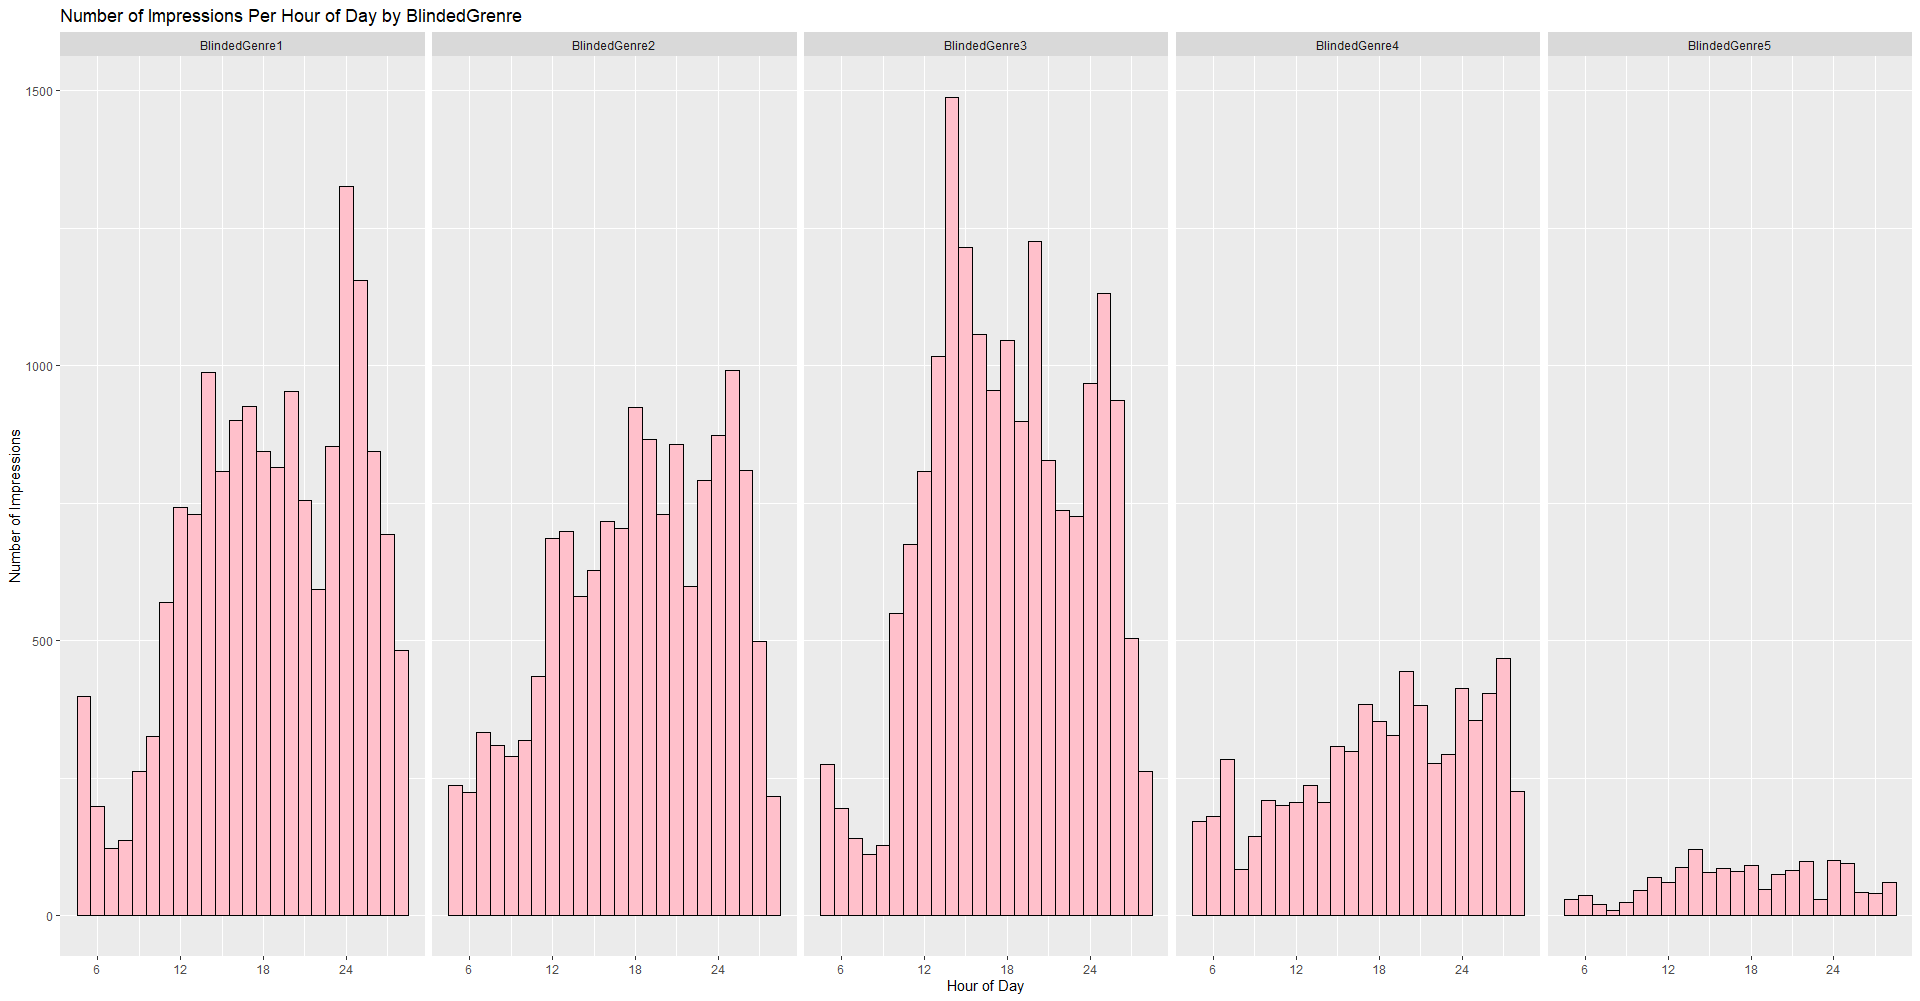

## Segment Characteristics Summary

Some general insights: 

1. genre1 and genre3 happen to me most popular 2 in terms of impression, genre5 happens to be the most boring one
2. US dominates
3. The most popular browswer amongst the top countries within the observation dataset is Chrome, followed by IE
4. PC is the most favorable one.



*****
**<font color=blue>BlindedGenre1: Action/Adventure</font>**
   - Tue, Wed, Thu, Fri, happen to be the significant days where impression occurs the most among the others
   - US,Canada,Japan,United Kingdom favor this genre
   - In a day, the peak time of impressions served orrurs around 11pm to midnight
*****

*****
**<font color=red>BlindedGenre2: Animation</font>**
   - Occurs frequently on Mon and Tue especially
   - US,Canada,Australia,Ireland,United Kingdom are the top 5 countries
   - there is a quite constant flow between 6pm and midnight

*****
**<font color=green>BlindedGenre3: Comedy</font>**
   - Occurs mostly on weekdays expect the a bit low impression on Thu
   - US,Canada,France,Australia,United Kingdom
   - Spike at 3pm and around 7pm, kids and adults
*****

*****
**<font color=pink>BlindedGenre4: Drama</font>**
   - Has an approximately even distribution over the weekdays and weekend days, quite conservative
   - US,Canada,Malaysia,Singapore,United Kingdom, two southeast Asia countries 
*****

*****
**<font color=orange>BlindedGenre5: Documentary or Sci-Fi</font>**
   - Impression is quite low over all days
   - US,United Kingdom,Canada,India,New Zealand
   - site like businessinsider, howtogeek, bbc, biology....
*****

#### United States Region

In [18]:
eng_list=["United States", "United Kingdom", "Canada", "Ireland", 
          "Australia", "New Zealand"]

df['English'] = df['country'].isin(eng_list)

In [19]:
df_us = df.loc[df['country'] == 'United States'] #109905
# df_us['region'].value_counts()

In [20]:
# external data to get region of repective State
df_region = pd.read_csv('region.csv')
df_region.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [21]:
df_merged = pd.merge(df_us, df_region, on='State', how='left')
df_merged.drop(['State Code','Division'],axis =1, inplace=True)
df_merged.head()

,tdid,logentrytime,logfileid,site,userHourOfWeek,country,State,metro,city,devicetype,osfamily,os,browser,FavoriteMovieGenre,userHourOfDay,weeHours,normHours,userDayOfWeek,English,Region
0,f0fd92db-69a2-4daf-a6cf-2ed33a506f28,5/2/2015 19:18,371391483,www.youtube.com,158,United States,Massachusetts,506,Boston,PC,Windows,Windows8,Chrome,BlindedGenre1,14,False,True,6,True,Northeast
1,10d01d03-f5f0-4a71-8282-ebdec05238db,5/2/2015 19:29,371399382,www.popupportal.com,158,United States,Maine,500,Waterville,PC,Windows,Windows8,Firefox,BlindedGenre1,14,False,True,6,True,Northeast
2,17c936b4-1baf-43e4-bb00-ad9f752efd7c,5/2/2015 11:11,371086147,yahoonetplus.com,150,United States,Virginia,518,Lambsburg,PC,Windows,Windows7,InternetExplorer,?????,6,False,True,6,True,South
3,17c936b4-1baf-43e4-bb00-ad9f752efd7c,5/2/2015 11:12,371087588,yahoonetplus.com,150,United States,Virginia,518,Lambsburg,PC,Windows,Windows7,InternetExplorer,?????,6,False,True,6,True,South
4,9bd03ad9-002a-4200-9602-b8a0bbad5d36,5/2/2015 3:14,370772995,damndelicious.net,142,United States,Michigan,505,Ann Arbor,PC,Windows,Windows7,Firefox,BlindedGenre2,22,False,True,5,True,Midwest


In [22]:
df_exposed_us = df_merged[df_merged['FavoriteMovieGenre']!= '?????']
df_exposed_us['FavoriteMovieGenre'].value_counts()

BlindedGenre3    16479
BlindedGenre1    15632
BlindedGenre2     9970
BlindedGenre4     5907
BlindedGenre5     1294
Name: FavoriteMovieGenre, dtype: int64

#### Exploratory Analysis by device type

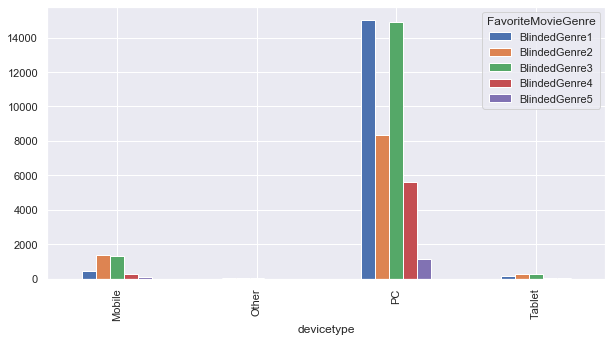

In [23]:
dev_type = df_exposed_us.groupby('devicetype').FavoriteMovieGenre.value_counts().sort_index()
dev_type.unstack().plot(kind='bar',figsize = (10,5))

#### Exploratory Analysis by broswers

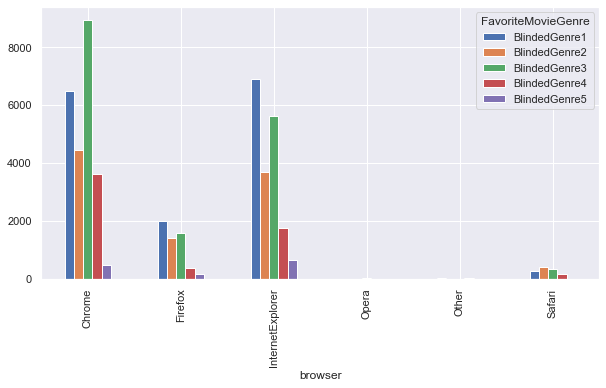

In [24]:
brows = df_exposed_us.groupby('browser').FavoriteMovieGenre.value_counts().sort_index()
brows.unstack().plot(kind = 'bar', figsize = (10,5))

#### Exploratory Analysis by region of US

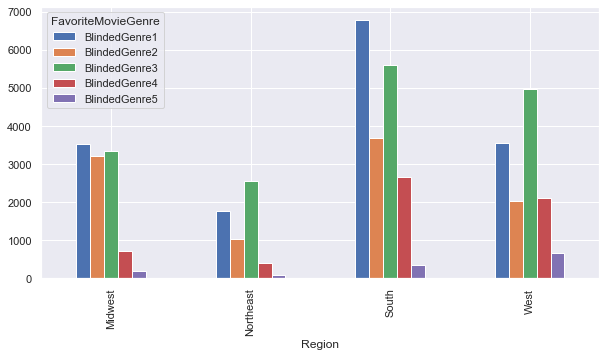

In [25]:
reg = df_exposed_us.groupby('Region').FavoriteMovieGenre.value_counts().sort_index()
reg.unstack().plot(kind = 'bar', figsize = (10,5))

## Modeling

In [26]:
from scipy import stats

from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [27]:
df_model = df_exposed.copy()

### Baseline Model 

**Assumption:** 

- remove id, logentrytime, logfileid, site, metro, userHourOfWeek(since generated related features from it)
- A simple quick and dirty model to see result
- Labelenconding of remaining categorical variables 

In [28]:
X = df_model.drop(['tdid', 'logentrytime','logfileid','site', 'metro', 'FavoriteMovieGenre','userHourOfWeek'],axis=1)
y = df_model['FavoriteMovieGenre']

In [29]:
# Utility function to do label encoding 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self 

    def transform(self,X):

        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [30]:
X = MultiColumnLabelEncoder(columns = ['country','State','city','devicetype',
                                   'osfamily','os','browser']).fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1)

classi_forest = RandomForestClassifier(n_estimators = 100,random_state=1)
classi_forest.fit(X_train,y_train)
ypred = classi_forest.predict(X_test)

In [32]:
print(metrics.classification_report(ypred, y_test))

               precision    recall  f1-score   support

BlindedGenre1       0.98      0.97      0.98      5005
BlindedGenre2       0.98      0.99      0.99      4255
BlindedGenre3       0.98      0.98      0.98      5372
BlindedGenre4       0.97      0.98      0.97      2018
BlindedGenre5       0.95      0.97      0.96       432

     accuracy                           0.98     17082
    macro avg       0.97      0.98      0.97     17082
 weighted avg       0.98      0.98      0.98     17082



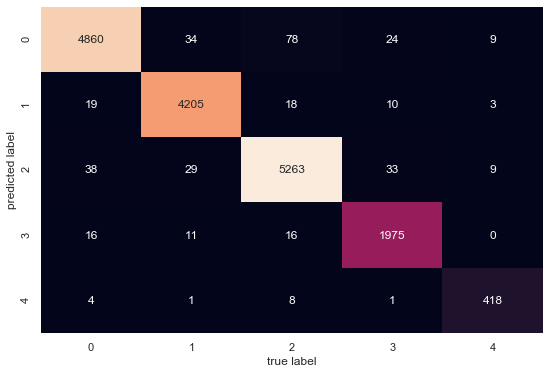

In [33]:
mat = confusion_matrix(y_test, ypred)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Grid searching key hyperparameters for RandomForestClassifier

In [36]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2','None']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.983889 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.980804 (0.002083) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.983445 (0.001731) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.983889 (0.001730) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.979956 (0.002080) with: {'max_features': 'log2', 'n_estimators': 10}
0.983421 (0.001423) with: {'max_features': 'log2', 'n_estimators': 100}
0.983872 (0.001730) with: {'max_features': 'log2', 'n_estimators': 1000}
0.000000 (0.000000) with: {'max_features': 'None', 'n_estimators': 10}
0.000000 (0.000000) with: {'max_features': 'None', 'n_estimators': 100}
0.000000 (0.000000) with: {'max_features': 'None', 'n_estimators': 1000}


In [34]:
df_new = df_unexposed.copy()

In [35]:
new_X = df_new.drop(['tdid', 'logentrytime','logfileid','site', 'metro', 
                           'FavoriteMovieGenre','userHourOfWeek'],axis=1)
new_X = MultiColumnLabelEncoder(columns = ['country','State','city','devicetype',
                                   'osfamily','os','browser']).fit_transform(new_X)

In [36]:
# Training a final classifier after getting the best params pair
clf = RandomForestClassifier(max_features='sqrt', n_estimators=1000)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
prediction = clf.predict(new_X)

df_unexposed['Genres'] = prediction
output = pd.DataFrame({'tdid':df_unexposed['tdid'], 
                       'Genere':df_unexposed['Genres']})

/Users/jasper/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
output.head(10)

,tdid,Genere
2,17c936b4-1baf-43e4-bb00-ad9f752efd7c,BlindedGenre1
3,17c936b4-1baf-43e4-bb00-ad9f752efd7c,BlindedGenre1
5,cfca8638-7c33-42d2-82ef-295fcceed3d2,BlindedGenre3
6,cfca8638-7c33-42d2-82ef-295fcceed3d2,BlindedGenre3
7,141d1247-a9e5-4c20-be80-a19cb223feb0,BlindedGenre2
9,aae3e721-c8ee-4dcb-8034-48930296f39a,BlindedGenre3
10,deed16f8-b153-442b-94fe-305e7c651c79,BlindedGenre3
12,24b605e8-2b18-4a28-99f5-72702bee5552,BlindedGenre1
13,24b605e8-2b18-4a28-99f5-72702bee5552,BlindedGenre1
14,24b605e8-2b18-4a28-99f5-72702bee5552,BlindedGenre1


In [41]:
# A Lookup of predicted MovieGenres of unexposed users 
output.drop_duplicates()

,tdid,Genere
2,17c936b4-1baf-43e4-bb00-ad9f752efd7c,BlindedGenre1
5,cfca8638-7c33-42d2-82ef-295fcceed3d2,BlindedGenre3
7,141d1247-a9e5-4c20-be80-a19cb223feb0,BlindedGenre2
9,aae3e721-c8ee-4dcb-8034-48930296f39a,BlindedGenre3
10,deed16f8-b153-442b-94fe-305e7c651c79,BlindedGenre3
...,...,...
114036,b567aee8-2a6f-490e-8cd3-03510063c86e,BlindedGenre3
114702,62ecf01f-5d01-42b2-bfa8-1a8657581015,BlindedGenre3
114764,cef08376-8f24-4134-903f-a5e7571c4026,BlindedGenre4
121015,4cf34d3f-6a3e-4205-b076-1572841a3a41,BlindedGenre1


## How Could the model be improved(unfinished tasks)

- Better data? and More data
   1. Data of exposed genres is not enough and label is inbalanced, eg.BlindedGenre5 is very few. Only used a subset of features and thus lose a lot of important infomation like site(feature engineering of user level data is needed). 
  
   2. The reason that model is overfitted since not enough data to fully capture infomation.
  
   3. Encoding of categorical variable should be improved. One disadvantage of me doing label encoding is that numerical value can be misinterpreted by the algorithm. For example, should US(encoded to 10) be given 10 times more weight than UK(eg.encoded to 2)
  
   4. Only Grid search to tune two parameters of the model 
 
- Need a better way or algorithm to categorize wesite feature

******

## Find Best Friends

**Assumption:** 
 1. Best friends love same genre movies and speak same language
 2. Here I only look up in New Jersey region where same language is spoken.
 3. Only used a subset of features which places the limitation on this work
 
**Simplest hypothesis:** favorite genre is the only factor that decides if two users can be best friends in our situation. In that way, user profile is only a list of movie genres, based on this array, calulate cos similarity

In [43]:
# df_exposed_us.head()

In [44]:
# Slice out New Jersey Area data where genres have been exposed
df_nj = df_exposed_us.loc[df_exposed_us['State'] == 'New Jersey']
# Make a copy
df_nj_orig = df_nj.copy()
# Drop columns
df_nj = df_nj.drop(['tdid','logentrytime','logfileid','site', 'metro','osfamily', 
               'os','weeHours', 'normHours','country','userHourOfWeek', 
                'State', 'Region','English'],axis=1)
# df_nj.head()

df_nj = pd.get_dummies(df_nj, columns=['city','devicetype','browser','FavoriteMovieGenre'])

In [45]:
# Create range of clusters 
from sklearn.cluster import KMeans

range_n_clusters = list(range(2,7))


for n_clusters in range_n_clusters:
 
    clusterer = KMeans(n_clusters=n_clusters).fit(df_nj)

    preds = clusterer.predict(df_nj)

    centers = clusterer.cluster_centers_
    
    score = silhouette_score(df_nj, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.4694450435299718
For n_clusters = 3. The average silhouette_score is : 0.39130452986505937
For n_clusters = 4. The average silhouette_score is : 0.37643650054677985
For n_clusters = 5. The average silhouette_score is : 0.37869422039838085
For n_clusters = 6. The average silhouette_score is : 0.37330119320039135


**Notes: Distance metric is used to descide a better number of cluster**
- The Silhouette Coefficient is calculated using the mean intra-cluster distance and the mean nearest-cluster distance for each sample.
- Metric is determined by Euclidean distance

In [46]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_nj)
labels = kmeans.labels_

df_nj_orig['clusters'] = labels
bf_grouped = df_nj_orig.groupby('clusters')

bf_group1 = bf_grouped.get_group(0)
bf_group2 = bf_grouped.get_group(1)

In [47]:
# Drop duplicate tdid for the sake of interpretation
bf_group1.drop_duplicates(subset = 'tdid', keep = 'first', inplace=True)
bf_group2.drop_duplicates(subset = 'tdid', keep = 'first', inplace=True)

# select feature and covert categoricals to numerical for further similarity score calculation
bf_new_group1 = bf_group1.filter(['FavoriteMovieGenre', 'userHourOfDay','city','devicetype','browser'], axis =1)
bf_new_group1 = pd.get_dummies(bf_new_group1, columns=['FavoriteMovieGenre','city','devicetype','browser'])

/Users/jasper/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jasper/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A = cosine_similarity(bf_new_group1)
A_sparse = sparse.csr_matrix(A)

similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
similarities = cosine_similarity(A_sparse)
# print('pairwise dense output:\n {}\n'.format(similarities))


# create our pairwise distance matrix
pairwise = pd.DataFrame(similarities_sparse.todense(),
                        columns = bf_new_group1.index,index = bf_new_group1.index)
# move to long form
long_form = pairwise.unstack()

# rename columns and turn into a dataframe
long_form.index.rename(['Person A', 'Person B'], inplace=True)
long_form = long_form.to_frame('cosine distance').reset_index()

# fitering out self value and sort by cosine score descendingly
long_form = long_form[(long_form['Person A'] != long_form['Person B'])]
long_form = long_form.sort_values(by=['cosine distance'], ascending=False)
long_form.head(10)

,Person A,Person B,cosine distance
613,16219,6244,1.000000
410,6244,16219,1.000000
503,8437,22589,1.000000
706,22589,8437,1.000000
213,2281,1152,1.000000
97,1152,2281,1.000000
586,11724,8437,1.000000
499,8437,11724,1.000000
593,11724,22589,0.999999
709,22589,11724,0.999999


In [49]:
# Display lookup pairs of two person being best friends
# I only extracted top 5 pairs
display_side_by_side(bf_group1.loc[[16219, 6244], ['tdid']],bf_group1.loc[[8437, 22589], ['tdid']],
                     bf_group1.loc[[2281, 1152], ['tdid']],bf_group1.loc[[11724, 22589], ['tdid']])

,tdid
16219,2f307829-3b54-4339-a7b1-1c3950067099
6244,e3dc4e24-1b64-4398-b129-1a1b8dd50bcc
,tdid
8437,c4233dd9-1db7-417a-8083-4c15309993e6
22589,f7ea656d-6930-4e23-8033-f309e5a8dc42
,tdid
2281,5bf404ab-1b00-4a3e-90be-325a4c1359cc
1152,f6dcae18-e8fd-47d7-bbd2-b671128d8296
,tdid
11724,3ca7463a-ffb4-4b0e-ab18-6983e70288bf


## Defensibility(Unfinished Work)

- Although cos similairy score can tell how confident we think of two might be good friends, we are not embeding more related information into data, which score manifested it. Another reason score being high might be that it is calculated after clustering. 
- Most important point is that a better main metric for evaluate whether people are best friends could be high proportion of overlapping visited sites. Need a better way to deal with sites to embed into data. 


**Some thoughts**
A bit more complicated hypothesis: users can be bbest friends if both their movie taste and watching habit are close to each other --> building more complicated user profile (feature extraction & weight tuning). Knowing the bias of visibility, we could build this golden dataset for model training / algo tuning based on existing friendship data and optimize more in production. And I have not figured out ranking method. 

**Reference:** 

1. https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

2. https://github.com/ritchieng/machine-learning-nanodegree/blob/master/unsupervised_learning/customer_segments/customer_segments.ipynb